In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df=pd.read_csv("/Users/rahulmanchanda/Desktop/python/Ridge,lasso Regression/dataset/cleaned_datset.csv")


In [11]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.0,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.0,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.0,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.0,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.0,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.0,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.0,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df.drop(columns=["day","month","year"],axis=1,inplace=True)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.0,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.0,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
df["Classes"]=df["Classes"].replace({"not fire":0,"fire":1})

/var/folders/d8/0vhs_fsn79zfcc0bpkcqbsmh0000gn/T/ipykernel_509/971360824.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Classes"]=df["Classes"].replace({"not fire":0,"fire":1})


In [18]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [19]:
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [20]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.0,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.0,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.0,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.0,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.0,79.7,4.3,15.2,1.7,5.1,0,1


In [21]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

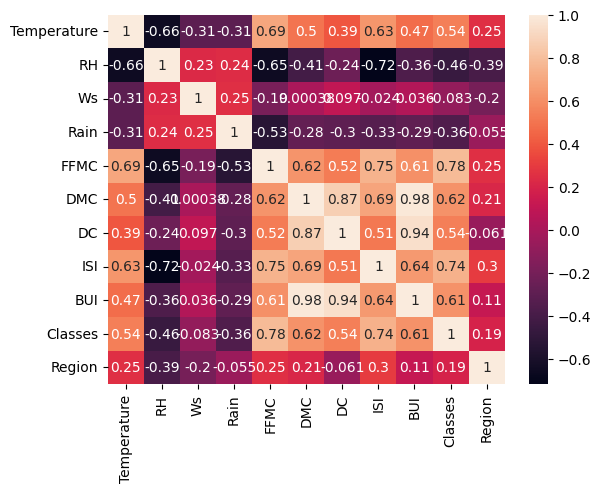

In [24]:
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [25]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [26]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [27]:
X_train.drop(columns=["BUI","DC"],axis=1,inplace=True)

In [28]:
X_test.drop(columns=["BUI","DC"],axis=1,inplace=True)

In [29]:
X_test.shape,X_train.shape

((61, 9), (182, 9))

In [30]:
print("Type of X_test:", type(X_test))
print("X_test is None:", X_test is None)
try:
    print("X_test shape:", X_test.shape)
except AttributeError:
    print("X_test has no shape attribute")


Type of X_test: <class 'pandas.core.frame.DataFrame'>
X_test is None: False
X_test shape: (61, 9)


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)


In [32]:
print(type(X_test))
print(X_test.shape if hasattr(X_test, 'shape') else "No shape attribute")


<class 'pandas.core.frame.DataFrame'>
(61, 9)


In [39]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [33]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [34]:
X_test_scaled=scaler.transform(X_test)

In [35]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.60236996e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.60236996e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         5.69736526e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -3.60236996e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.60236996e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.04749765e-01, -2.67739147e-01, -2.406729

<Axes: >

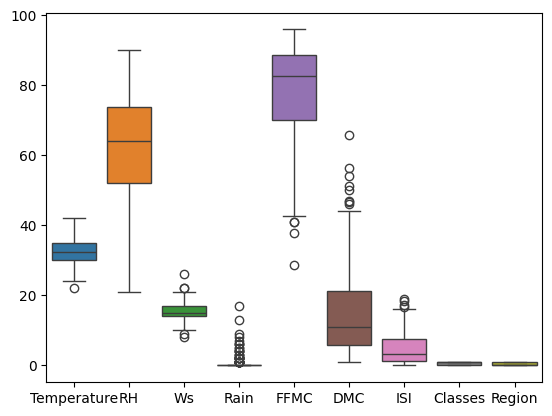

In [28]:
sns.boxplot(data=X_train)

In [1]:
X_train_scaled.features

NameError: name 'X_train_scaled' is not defined

<Axes: >

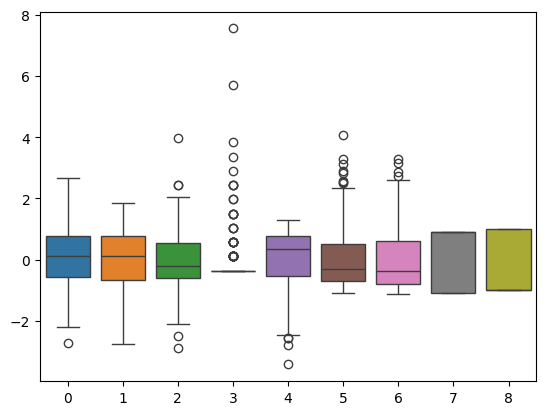

In [29]:
sns.boxplot(data=X_train_scaled)

Linear Regression model

In [30]:
from sklearn.linear_model   import  LinearRegression
Regression=LinearRegression()
Regression.fit(X_train_scaled,y_train)
y_pred=Regression.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [33]:
mae,mse,rmse,r2

(0.5475128858470335,
 0.6751215993217059,
 np.float64(0.8216578359157211),
 0.9847466489197018)

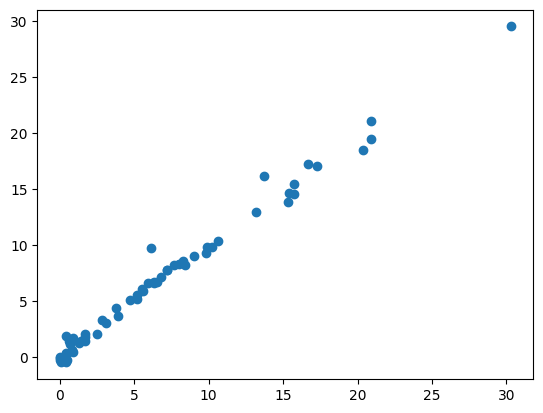

In [34]:
plt.scatter(y_test,y_pred)

Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train_scaled,y_train)
y_pred=las.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [36]:
mae,r2

(1.1331759954792284, 0.9492020261403414)

In [37]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(X_train_scaled,y_train)

LassoCV()

In [38]:
y_pred=lassocv.predict(X_test_scaled)

In [39]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [40]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [41]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

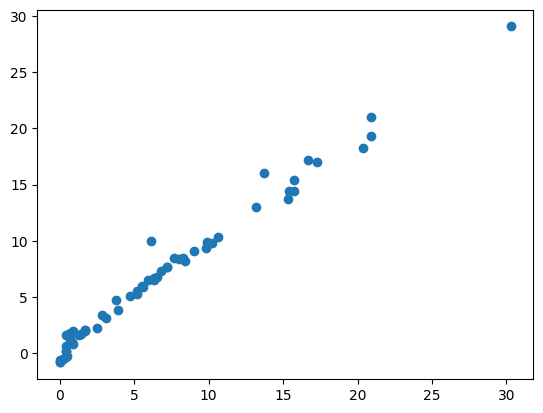

In [42]:
plt.scatter(y_test,y_pred)

In [43]:
from sklearn.linear_model import Ridge
r=Ridge()
r.fit(X_train_scaled,y_train)
y_pred=r.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [44]:
mae,r2

(0.5650861565478263, 0.9842818900318686)

ElasticNEt

In [45]:
from sklearn.linear_model import ElasticNet
Elas=ElasticNet()
Elas.fit(X_train_scaled,y_train)
y_pred=Elas.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [46]:
mae,r2

(1.8822354982203107, 0.8753460309553102)

In [47]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(Ridge,open("Ridge.pkl","wb"))